# Tarea 2 - Machine Learning
---

## Claudia Hazard 201404523-9
## Matías Araya 201173082-8

---

## 1. Tipos de fronteras en Clasificación
---

# a)
---

Se comienza creando dataset con 2 dimensiones, conformado por dos conjuntos de datos.

In [75]:
import numpy as np
import matplotlib.pyplot as plt

n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
from sklearn.utils import check_random_state
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

Se agrega ruido al conjunto de datos para así realizar un estudio mas realista.

In [77]:
X = np.concatenate((datos1, datos2), axis=0)
print len(X)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)

1000


Con la configuración de el código anterior existen $1000$ datos en total, los cuales $520$ corresponden a un grupo (puntos azules) y $480$ a otro (puntos verdes). Se nota como el ruido de de $20$ correspondientes realmente al grupo azul, se asemejan más a la figura del grupo verde por lo que genera ruido a la muestra.

La función `visualize_border` es de utilidad para visualizar el conjunto de datos con su respectivo clasificador, el que se utilizará en preguntas posteriores.

In [21]:
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))

    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

# b) LDA
---

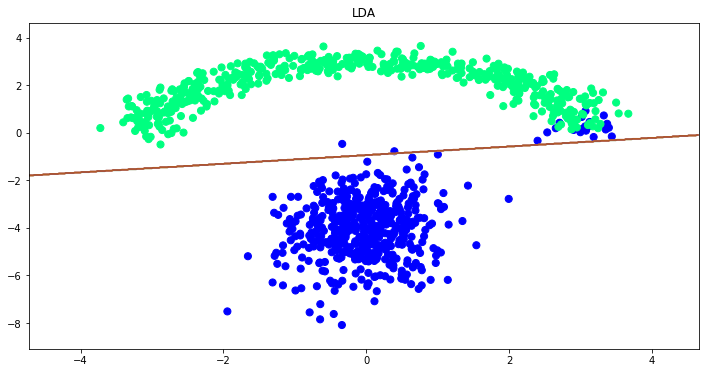

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_lda = LDA()
model_lda.fit(X,y)
visualize_border(model_lda,X,y,"LDA")

Con Linear Discriminant Analysis (LDA), como se ve en la figura mostrada, traza una linea clara que logra separar la clasificación de ambos grupos, quedando así la mayoría de los puntos azules por un lado y la totalidad de los verdes en el otro.

# c) QDA
--- 

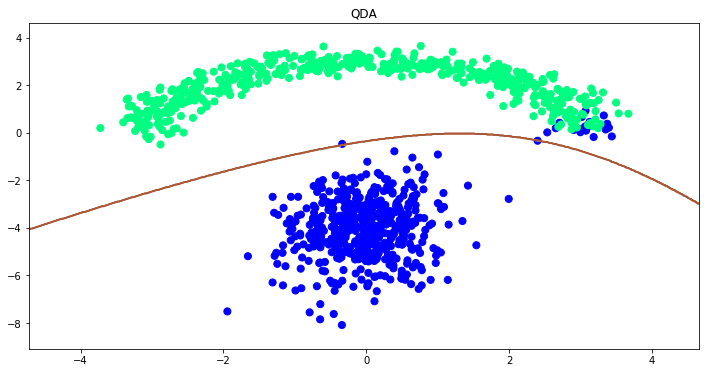

In [23]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model_qda = QDA()
model_qda.fit(X,y)
visualize_border(model_qda,X,y,"QDA")

En este caso con Quadratic Discriminant Analysis (QDA), como lo dice su nombre al ser de tipo cuadrático, logra crear una curva asemejandose de mejor manera a la figura y cualitativamente se podría decir que clasifica mejor que LDA. Esto sin embargo conlleva un mayor costo de computación además de mayor posibilidad de overfitting, con lo que se analiza en próxima sección si vale la pena.

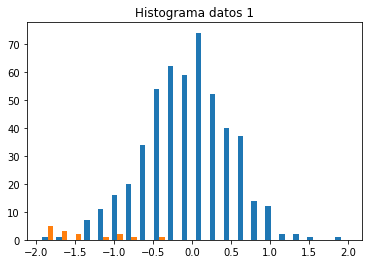

In [24]:
plt.hist(datos1, bins='auto')
plt.title("Histograma datos 1")
plt.show()

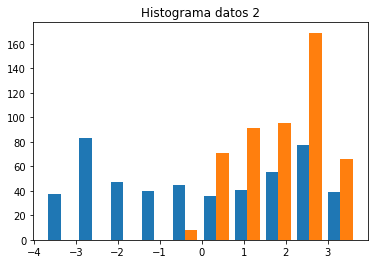

In [25]:
plt.hist(datos2, bins='auto')
plt.title("Histograma datos 2")
plt.show()

# d)
---

In [26]:
from sklearn.metrics import accuracy_score

y_pred_lda = model_lda.predict(X)
y_pred_qda = model_qda.predict(X)

y_true = y

print("Miss Classification Loss LDA: %f"%(1-accuracy_score(y_true, y_pred_lda)))
print("Miss Classification Loss QDA: %f"%(1-accuracy_score(y_true, y_pred_qda)))

Miss Classification Loss LDA: 0.022000
Miss Classification Loss QDA: 0.020000


Con esto se puede ver que la diferencia entre los errores es muy pequña, donde LDA tiene un error de clasificación de $0.021$ y QDA es levemente menor con $0.020$. Con esto se puede comprobar, para este pequeño caso, que no es necesario utilizar QDA ya que genera un gasto extra además de generar un mayor overfitting y no se obtiene una mejor calidad en la predicción.

# e)
---

In [27]:
from ipywidgets import interactive

def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)

In [83]:
from sklearn.linear_model import LogisticRegression as LR
def train_model(param):
    model=LR() #define your model
    model.set_params(C=param,penalty='l2')
    model.fit(X,y)
    return model

p_min = 0.1
p_max = 10
interactive(visualize_border_interactive, param=(p_min, p_max))

A Jupyter Widget

Como se puede apreciar en el gráfico interactivo, cambiando el paramétro se mueve ligeramente la línea divisiora de la regresión que separa ambas clases. Esto se puede asemejar a lo que hace Ridge o Lasso, donde se penalizan los coeficientes restando importancia a los que influyen de menor manera en el modelo. Así, si el parámetro es bajo, cercano a cero, tiene menos aceptación a que haya puntos mal clasificados. Con el parámetro en $0.1$ ni un punto verde queda completamente en el grupo azul. Mientras que, con un parámetro más alto, por ejemplo $10$ se nota como cambia donde la pendiente de la recta se hace más pronunciada, aceptando así algunos puntos verdes en el grupo azul.

## f)
---

Support Vector Machine (SVM), a diferencia de la otras técnicas que se han visto, busca minimizar la distancia a los puntos más cercanos del hiperplano. No como el resto de los métodos que minimiza los errores.

In [99]:
from sklearn.svm import SVC as SVM #SVC is for classification

def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y)
    return model

p_min = 0.1
p_max = 1
interactive(visualize_border_interactive, param=(p_min, p_max))

A Jupyter Widget

El efecto es casi el mismo que la Regresión Logística, donde con una valor alto de el parámetro $C$ la línea divisora queda con una mayor pendiente, aceptando así los valores azules correspondientes al ruido pero incluyendo también unos pocos del conjunto verde. Mientras que con un $C$ cercano a cero permite menos puntos azules de los correspondientes al ruido pero no acepta ni un verde en el conjunto azul. 

## g)
---

Una solución simplificada para SVM no Lineal puede ser escrita como:

$$\hat{f(x)} = \displaystyle\sum_{i=1}^{n} \hat{\alpha_i}y_i K(x,x_i) + \hat{\beta_0}$$

Donde $K(x, x_i)$ es la función Kernel y se cumple que para todo $x_i$, $0 < \alpha_i < C$.

In [97]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='rbf')
    model.fit(X,y)
    return model

p_min = 0.1
p_max = 1
interactive(visualize_border_interactive, param=(p_min, p_max))

A Jupyter Widget

In [98]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='poly')
    model.fit(X,y)
    return model

p_min = 0.1
p_max = 1
interactive(visualize_border_interactive, param=(p_min, p_max))

A Jupyter Widget

El rol del parámetro $C$ es claro en un espacio con más atributos, esto dado que una separación perfecta es usualmente conseguible. Un valor grande de $C$ hará que sea más ondulado, mientras que uno más pequeño reflejará curvas más suaves.

El efecto anterior explicado se puede ver de buena manera con el Kernel rbf, donde cambiando el parámetro con un valor de $1$ quedan las líneas más onduladas encerrando al conjunto verde. Mientras cuando se asigna un valor cercano a cero, $0.1$, se ve reflejado que las línas encierran al grupo azul siendo más suave las curvas.